### Install required Packages

In [ ]:
#!pip install gensim==3.6.0

## Load word2vec pre trained model using gensim

In [2]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
glove_model = api.load('glove-wiki-gigaword-50')
api.info('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


{'num_records': 400000,
 'file_size': 69182535,
 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-50/__init__.py',
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'parameters': {'dimension': 50},
 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).',
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-50.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'checksum': 'c289bc5d7f2f02c6dc9f2f9b67641813',
 'file_name': 'glove-wiki-gigaword-50.gz',
 'parts': 1}

Get word vec for any word

In [4]:
print("Vector for computer word",glove_model['computer'])
print("--------------------------------------------------------------------------------")
print("Vector for computer word",glove_model['laptop'])

Vector for computer word [ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]
--------------------------------------------------------------------------------
Vector for computer word [ 0.59754  -0.21225   2.1719    0.15673   0.38409  -0.47869  -0.060613
 -0.9584    0.5184    0.56782   0.062268  0.13887  -0.14047   0.082245
  0.39597   0.12775  -2.03      1.2655    0.92248  -0.74247   0.35148
  0.064091 -0.30828   0.36743   0.099275 -1.2918   -0.22716   0.025201
  0.38823  -0.76859   1.3206    0.062628 -0.094857  0.15232   0.9426
  1.1285    0.

What is the length of vector?

In [5]:
###calcualte the length of vector
############ Exercise To Do######################

In [7]:
cosine_similarity([glove_model['computer'],glove_model['laptop']])

array([[1.0000002 , 0.77411586],
       [0.77411586, 1.        ]], dtype=float32)

## Get top most similar words for any given word

In [8]:
glove_model.most_similar('india',topn=5)

[('indian', 0.8648794889450073),
 ('pakistan', 0.8529723286628723),
 ('malaysia', 0.816650927066803),
 ('bangladesh', 0.8154239058494568),
 ('delhi', 0.8142766952514648)]

## Word Analogy

In [9]:
# Analogy using word2vec
def analogy(model,x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy(glove_model,'king', 'man', 'queen')

'woman'

In [19]:
#calculate analogy for india:delhi, japan:
############ Exercise To Do######################

## Word Cluster

In [20]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from sklearn.decomposition import PCA

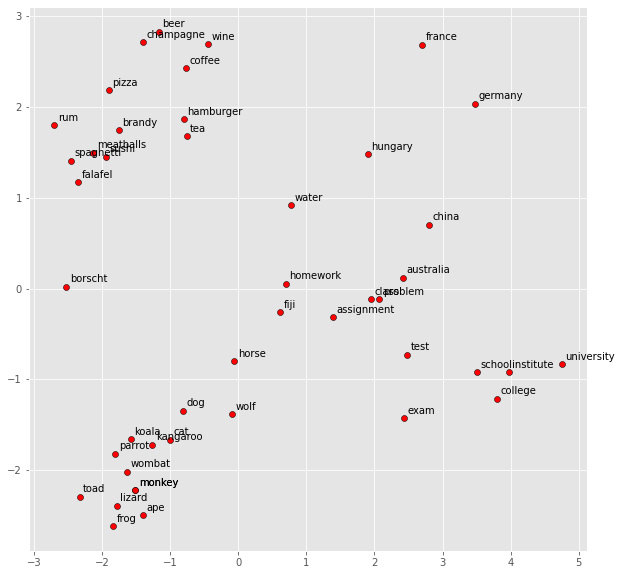

In [23]:
display_pca_scatterplot(glove_model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

## Train Word2Vec Model

In [24]:
corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [25]:
from gensim.test.utils import common_texts

In [26]:
wv_model = Word2Vec(sentences=corpus,size=24, window=3, min_count=100)

# ............................ **Working Session: (Audience)** ................
1. calculate the cosine similarity between college and university
2. Return top similar word for "pizza"
3. Plot the words by taking top 2 principle components

In [29]:
#calculate the cosine similarity between college and university
############ Exercise To Do ######################

In [30]:
#Return top similar word for "pizza"
############ Exercise To Do ######################

In [63]:
#Plot the words by taking top 2 principle components
############ Exercise To D o######################

# Can we use pretrained model ? -- Yes, download word2vec pre trained models and retrain on custom dataset